In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [19]:
df=pd.read_csv('/content/ananadvihar(8hr).csv')

In [20]:
df.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,WS,Temp
0,31-10-2024 16:00,01-11-2024 00:00,286.75,513.62,68.15,77.91,96.84,43.16,10.10,2.16,11.93,0.60,NaN
1,31-10-2024 08:00,31-10-2024 16:00,181.74,427.75,58.53,63.59,81.41,55.00,7.05,2.22,21.84,1.19,NaN
2,31-10-2024 00:00,31-10-2024 08:00,255.88,514.75,220.77,75.89,219.88,58.53,8.21,3.40,7.24,0.47,NaN
3,31-08-2024 16:00,01-09-2024 00:00,51.53,352.27,30.38,46.06,49.25,14.91,12.91,1.66,78.80,0.78,NaN
4,31-08-2024 08:00,31-08-2024 16:00,54.76,265.50,50.71,60.13,68.80,14.10,4.18,0.85,58.22,1.16,NaN


In [21]:
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')

In [22]:
breakpoints = {
    'PM2.5': [
        (0, 30, 0, 50),
        (31, 60, 51, 100),
        (61, 90, 101, 200),
        (91, 120, 201, 300),
        (121, 250, 301, 400),
        (251, 500, 401, 500)
    ],
    'PM10': [
        (0, 50, 0, 50),
        (51, 100, 51, 100),
        (101, 250, 101, 200),
        (251, 350, 201, 300),
        (351, 430, 301, 400),
        (431, 600, 401, 500)
    ],
    'NO2': [
        (0, 40, 0, 50),
        (41, 80, 51, 100),
        (81, 180, 101, 200),
        (181, 280, 201, 300),
        (281, 400, 301, 400),
        (401, 1000, 401, 500)
    ],
    'SO2': [
        (0, 40, 0, 50),
        (41, 80, 51, 100),
        (81, 380, 101, 200),
        (381, 800, 201, 300),
        (801, 1600, 301, 400),
        (1601, 2000, 401, 500)
    ],
    'CO': [
        (0, 1, 0, 50),
        (1.1, 2, 51, 100),
        (2.1, 10, 101, 200),
        (10.1, 17, 201, 300),
        (17.1, 34, 301, 400),
        (34.1, 50, 401, 500)
    ],
    'Ozone': [
        (0, 50, 0, 50),
        (51, 100, 51, 100),
        (101, 168, 101, 200),
        (169, 208, 201, 300),
        (209, 748, 301, 400),
        (749, 1000, 401, 500)
    ]
}

In [23]:
def calculate_sub_index(concentration, pollutant):
    if pollutant in breakpoints:
        for bp in breakpoints[pollutant]:
            if bp[0] <= concentration <= bp[1]:

                return ((bp[3] - bp[2]) / (bp[1] - bp[0])) * (concentration - bp[0]) + bp[2]
    return None


for pollutant in breakpoints.keys():
    if pollutant in df.columns:
        df[f'{pollutant}_SubIndex'] = df[pollutant].apply(lambda x: calculate_sub_index(x, pollutant))


sub_indices = [f'{pollutant}_SubIndex' for pollutant in breakpoints.keys()]
df['AQI'] = df[sub_indices].max(axis=1)


df.to_csv("dataset_with_aqi.csv", index=False)


In [24]:
df.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,WS,Temp,PM2.5_SubIndex,PM10_SubIndex,NO2_SubIndex,SO2_SubIndex,CO_SubIndex,Ozone_SubIndex,AQI
0,2024-10-31 16:00:00,01-11-2024 00:00,286.75,513.62,68.15,77.91,96.84,43.16,10.10,2.16,11.93,0.60,NaN,415.213855,449.398698,97.374103,12.6250,101.751899,11.93,449.398698
1,2024-10-31 08:00:00,31-10-2024 16:00,181.74,427.75,58.53,63.59,81.41,55.00,7.05,2.22,21.84,1.19,NaN,347.614419,397.180380,79.382308,8.8125,102.503797,21.84,397.180380
2,2024-10-31 00:00:00,31-10-2024 08:00,255.88,514.75,220.77,75.89,219.88,58.53,8.21,3.40,7.24,0.47,NaN,402.940241,450.060651,94.836154,10.2625,117.291139,7.24,450.060651
3,2024-08-31 16:00:00,01-09-2024 00:00,51.53,352.27,30.38,46.06,49.25,14.91,12.91,1.66,78.80,0.78,NaN,85.688621,302.591519,57.357436,16.1375,81.488889,78.80,302.591519
4,2024-08-31 08:00:00,31-08-2024 16:00,54.76,265.50,50.71,60.13,68.80,14.10,4.18,0.85,58.22,1.16,NaN,91.146207,215.500000,75.035128,5.2250,42.500000,58.22,215.500000


In [27]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'WS']
target = 'AQI'

In [31]:
df = df.dropna(subset=features + [target])

In [32]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
y = df[target]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [36]:
y_pred = rf_model.predict(X_test)


In [41]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 5.39
Mean Squared Error (MSE): 101.88
R² Score: 0.9929


In [42]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [43]:
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
evaluate_model(best_rf, X_test, y_test, y_pred_rf)

Model: RandomForestRegressor
Mean Absolute Error (MAE): 5.52
Mean Squared Error (MSE): 108.17
R² Score: 0.9924



(5.517000047645171, 108.17386185098019, 0.992408971537081)

In [44]:
# Gradient Boosting Regressor
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
gb_grid.fit(X_train, y_train)

# Best Gradient Boosting Model
best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)
evaluate_model(best_gb, X_test, y_test, y_pred_gb)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Model: GradientBoostingRegressor
Mean Absolute Error (MAE): 5.44
Mean Squared Error (MSE): 89.03
R² Score: 0.9938



(5.435927553078182, 89.02744160788316, 0.9937525587821086)

In [45]:
# XGBoost Regressor

xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

xgb_model = XGBRegressor(random_state=42, verbosity=0)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
xgb_grid.fit(X_train, y_train)

# Best XGBoost Model
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
evaluate_model(best_xgb, X_test, y_test, y_pred_xgb)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Model: XGBRegressor
Mean Absolute Error (MAE): 8.86
Mean Squared Error (MSE): 215.52
R² Score: 0.9849



(8.857284009211877, 215.51994640561657, 0.9848760317927301)

In [46]:
# Support Vector Regressor (SVR)

svr_params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]
}

svr_model = SVR()
svr_grid = GridSearchCV(svr_model, svr_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
svr_grid.fit(X_train, y_train)

# Best SVR Model
best_svr = svr_grid.best_estimator_
y_pred_svr = best_svr.predict(X_test)
evaluate_model(best_svr, X_test, y_test, y_pred_svr)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Model: SVR
Mean Absolute Error (MAE): 26.49
Mean Squared Error (MSE): 1783.23
R² Score: 0.8749



(26.48646650256949, 1783.229790365555, 0.8748630411916138)

In [47]:
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

mlp_model = MLPRegressor(random_state=42)
mlp_grid = GridSearchCV(mlp_model, mlp_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
mlp_grid.fit(X_train, y_train)

# Best MLP Model
best_mlp = mlp_grid.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)
evaluate_model(best_mlp, X_test, y_test, y_pred_mlp)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Model: MLPRegressor
Mean Absolute Error (MAE): 44.72
Mean Squared Error (MSE): 3682.94
R² Score: 0.7416



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


(44.719176507082715, 3682.938911803839, 0.7415522231682083)

In [48]:
# Linear Regression (Baseline Model)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
evaluate_model(lr_model, X_test, y_test, y_pred_lr)

Model: LinearRegression
Mean Absolute Error (MAE): 47.63
Mean Squared Error (MSE): 4048.52
R² Score: 0.7159



(47.63234891028035, 4048.523064670818, 0.7158975995602572)

In [49]:
model_comparisons = []

def store_results(model_name, mae, mse, r2):
    model_comparisons.append({
        "Model": model_name,
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "R² Score": r2
    })

store_results("Random Forest", *evaluate_model(best_rf, X_test, y_test, y_pred_rf))
store_results("Gradient Boosting", *evaluate_model(best_gb, X_test, y_test, y_pred_gb))
store_results("XGBoost", *evaluate_model(best_xgb, X_test, y_test, y_pred_xgb))
store_results("Support Vector Regressor (SVR)", *evaluate_model(best_svr, X_test, y_test, y_pred_svr))
store_results("Multi-Layer Perceptron (MLP)", *evaluate_model(best_mlp, X_test, y_test, y_pred_mlp))
store_results("Linear Regression (Baseline)", *evaluate_model(lr_model, X_test, y_test, y_pred_lr))


comparison_df = pd.DataFrame(model_comparisons)

comparison_df = comparison_df.sort_values(by="R² Score", ascending=False)


print(comparison_df)
##comparison_df.to_csv("model_comparison_results.csv", index=False)


Model: RandomForestRegressor
Mean Absolute Error (MAE): 5.52
Mean Squared Error (MSE): 108.17
R² Score: 0.9924

Model: GradientBoostingRegressor
Mean Absolute Error (MAE): 5.44
Mean Squared Error (MSE): 89.03
R² Score: 0.9938

Model: XGBRegressor
Mean Absolute Error (MAE): 8.86
Mean Squared Error (MSE): 215.52
R² Score: 0.9849

Model: SVR
Mean Absolute Error (MAE): 26.49
Mean Squared Error (MSE): 1783.23
R² Score: 0.8749

Model: MLPRegressor
Mean Absolute Error (MAE): 44.72
Mean Squared Error (MSE): 3682.94
R² Score: 0.7416

Model: LinearRegression
Mean Absolute Error (MAE): 47.63
Mean Squared Error (MSE): 4048.52
R² Score: 0.7159

                            Model  Mean Absolute Error (MAE)  \
1               Gradient Boosting                   5.435928   
0                   Random Forest                   5.517000   
2                         XGBoost                   8.857284   
3  Support Vector Regressor (SVR)                  26.486467   
4    Multi-Layer Perceptron (MLP)       

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

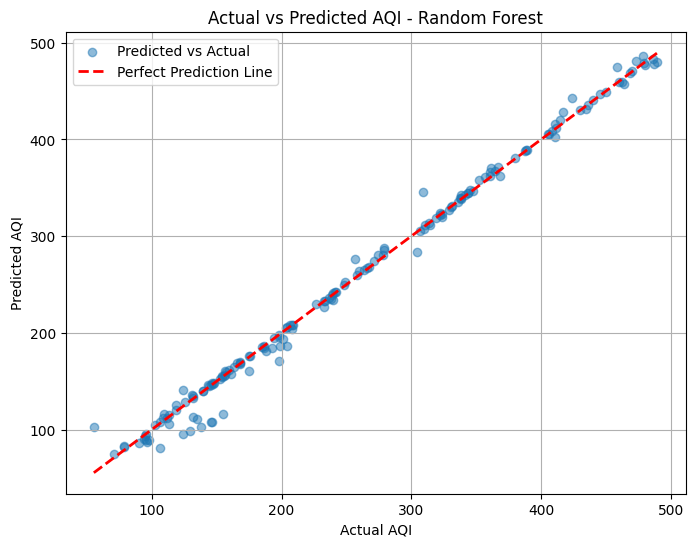

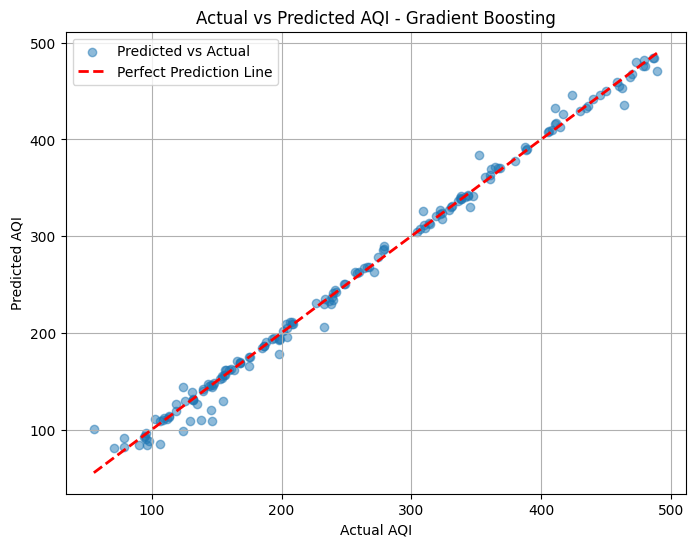

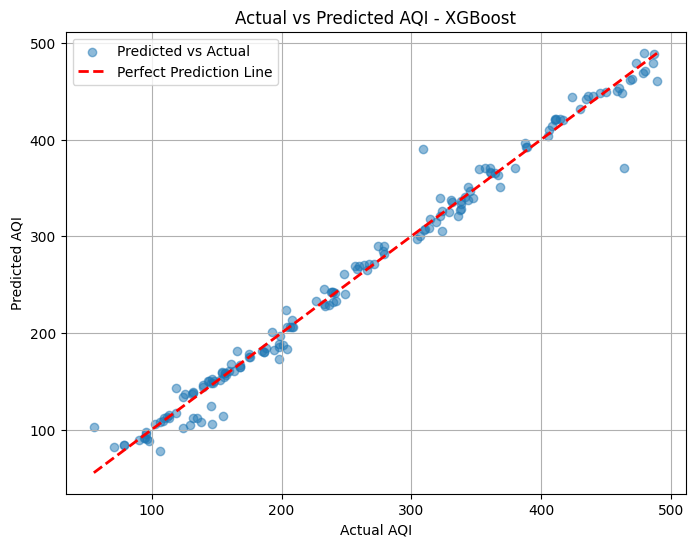

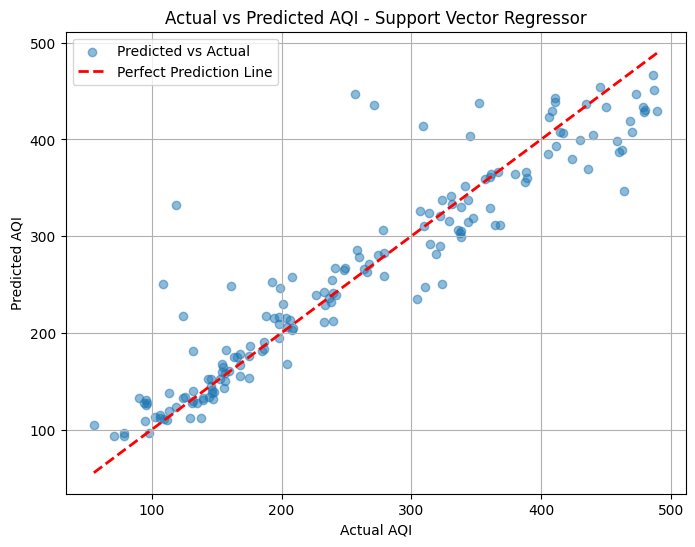

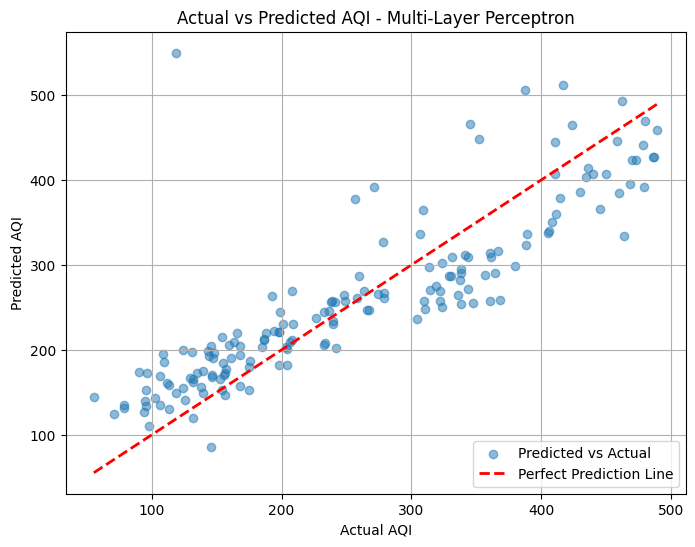

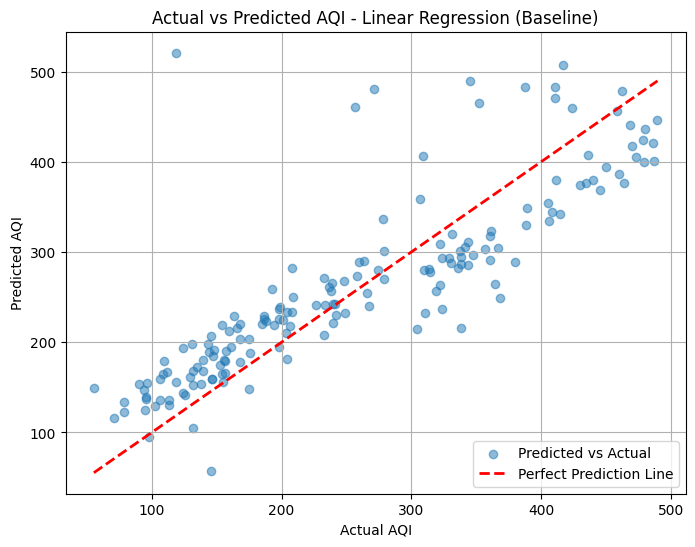

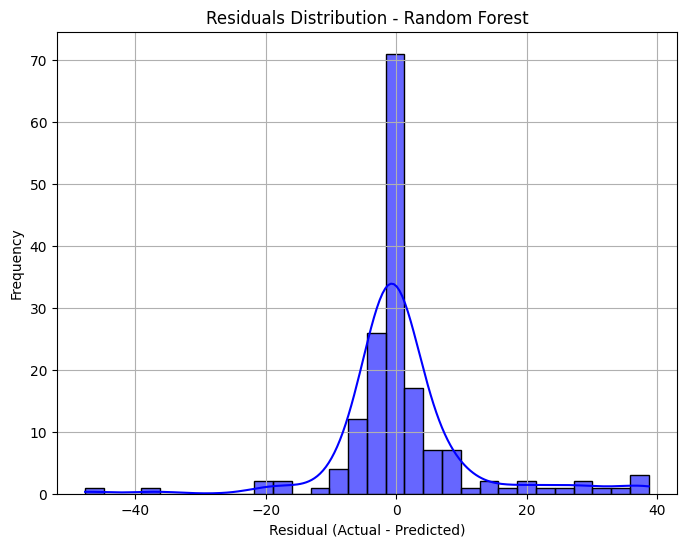

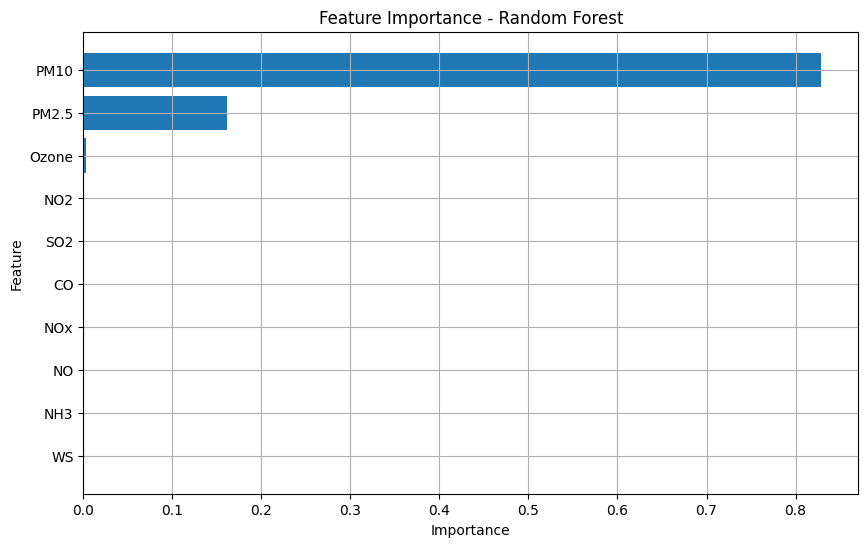

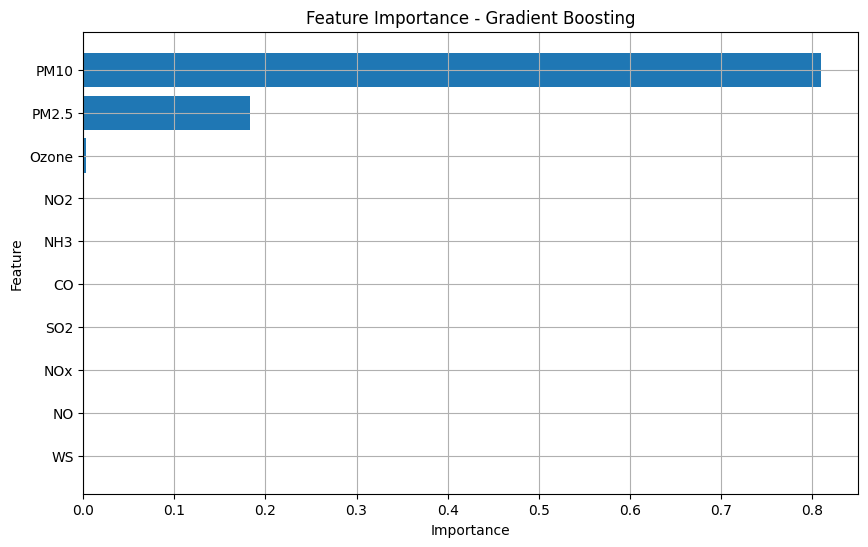

In [51]:

def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
    plt.title(f"Actual vs Predicted AQI - {model_name}")
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.legend()
    plt.grid()
    plt.show()

plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest")
plot_actual_vs_predicted(y_test, y_pred_gb, "Gradient Boosting")
plot_actual_vs_predicted(y_test, y_pred_xgb, "XGBoost")
plot_actual_vs_predicted(y_test, y_pred_svr, "Support Vector Regressor")
plot_actual_vs_predicted(y_test, y_pred_mlp, "Multi-Layer Perceptron")
plot_actual_vs_predicted(y_test, y_pred_lr, "Linear Regression (Baseline)")


def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f"Residuals Distribution - {model_name}")
    plt.xlabel("Residual (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()


plot_residuals(y_test, y_pred_rf, "Random Forest")


def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        sorted_idx = np.argsort(importance)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_idx)), importance[sorted_idx], align="center")
        plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
        plt.title(f"Feature Importance - {model_name}")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.grid()
        plt.show()
    else:
        print(f"Feature importance not available for {model_name}")


plot_feature_importance(best_rf, features, "Random Forest")
plot_feature_importance(best_gb, features, "Gradient Boosting")
